In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import json 

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
raw_data = pd.read_csv("./raw_data.csv", index_col=0)

In [3]:
raw_data.head()

,purchasing_user_profile_id,selling_user_profile_profile_url,nifty_obj_name,nifty_obj_total_num_editions,nifty_obj_likes,nifty_obj_token_id,nifty_obj_timestamp,nifty_obj_contract_address,nifty_obj_img_url,nifty_obj_made_user,purchasing_user_profile_profile_url,selling_user_profile_id,selling_user_profile_name,purchasing_user_profile_name
0,37927,allabouttheu,m(40) #28516,28983,602,28516,2021-12-01T15:46:38.684451Z,0xc3f8a0f5841abff777d3eefa5047e8d413a1c9ab,<svg xmlns='http://www.w3.org/2000/svg' versio...,5732,hopper,623641,AllAboutTheU,Ryan
1,129272,nftran,DEFCON 1 by Creatiflux #27/50,50,16,75,2022-03-29T17:40:51.591425Z,0xece5f6b28eccb6a9d1b972526d77773fb4167f80,https://media.niftygateway.com/video/upload/v1...,616892,hugom,723861,Nftran,HUGOM88888
2,20559,c12i34,m(1) #27630,28983,602,27630,2021-12-01T15:46:38.684451Z,0xc3f8a0f5841abff777d3eefa5047e8d413a1c9ab,<svg xmlns='http://www.w3.org/2000/svg' versio...,5732,torge,837637,Chubbi Analyst,T
3,12608,rvt8,m(1) #14288,28983,602,14288,2021-12-01T15:46:38.684451Z,0xc3f8a0f5841abff777d3eefa5047e8d413a1c9ab,<svg xmlns='http://www.w3.org/2000/svg' versio...,5732,zeddcules,748120,Rohan,ZeDdCuLeS
4,12608,csenang,m(2) #23525,28983,602,23525,2021-12-01T15:46:38.684451Z,0xc3f8a0f5841abff777d3eefa5047e8d413a1c9ab,<svg xmlns='http://www.w3.org/2000/svg' versio...,5732,zeddcules,278404,csenang,ZeDdCuLeS


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160219 entries, 0 to 160218
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   purchasing_user_profile_id           160219 non-null  int64 
 1   selling_user_profile_profile_url     160216 non-null  object
 2   nifty_obj_name                       160219 non-null  object
 3   nifty_obj_total_num_editions         160219 non-null  int64 
 4   nifty_obj_likes                      160219 non-null  int64 
 5   nifty_obj_token_id                   160219 non-null  int64 
 6   nifty_obj_timestamp                  160219 non-null  object
 7   nifty_obj_contract_address           160219 non-null  object
 8   nifty_obj_img_url                    160216 non-null  object
 9   nifty_obj_made_user                  160219 non-null  int64 
 10  purchasing_user_profile_profile_url  160217 non-null  object
 11  selling_user_profile_id   

In [5]:
# 사는 사람보다 판 사람이 더 많다
raw_data[['purchasing_user_profile_id', 'selling_user_profile_id']].nunique()

purchasing_user_profile_id    28223
selling_user_profile_id       31464
dtype: int64

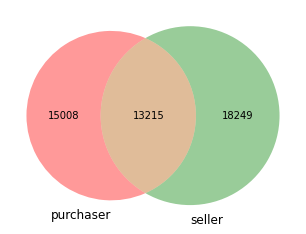

In [6]:
# 팔기만 하는 사람도 존재하고, 사기만 하는 사람도 존재한다
purchased = set(raw_data['purchasing_user_profile_id'])
sell = set(raw_data['selling_user_profile_id'])
# len(purchased.difference(sell))
# len(purchased.intersection(sell))
# len(sell.difference(purchased))

venn2(subsets=(len(purchased.difference(sell)), len(sell.difference(purchased)), len(purchased.intersection(sell))),
        set_labels = ('purchaser', 'seller'))
plt.show()

In [7]:
# 데이터 전처리
new_data = raw_data.copy()
for x in new_data.columns:
    if new_data[x].dtype == 'object':
        new_data[x] = [s.strip() if not s is np.nan else s for s in new_data[x]]
new_data = new_data.dropna(subset=['nifty_obj_img_url'], axis=0)
new_data['nifty_obj_img_url'] = [x if x.startswith('http') else np.nan for x in new_data['nifty_obj_img_url']]
new_data = new_data.dropna(subset=['nifty_obj_img_url'], axis=0)
new_data['img_url'] = [x.split('/')[-1] for x in new_data['nifty_obj_img_url']]
new_data['extension'] = [x.split('.')[-1] if len(x.split('.')[-1]) < 10 else np.nan for x in new_data['img_url']]
new_data['nifty_obj_timestamp'] = [datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ') for x in new_data['nifty_obj_timestamp']]
new_data.reset_index(drop=True, inplace=True)

In [8]:
new_data.columns

Index(['purchasing_user_profile_id', 'selling_user_profile_profile_url',
       'nifty_obj_name', 'nifty_obj_total_num_editions', 'nifty_obj_likes',
       'nifty_obj_token_id', 'nifty_obj_timestamp',
       'nifty_obj_contract_address', 'nifty_obj_img_url',
       'nifty_obj_made_user', 'purchasing_user_profile_profile_url',
       'selling_user_profile_id', 'selling_user_profile_name',
       'purchasing_user_profile_name', 'img_url', 'extension'],
      dtype='object')

In [9]:
user_colnames = ['user_profile_id', 'user_profile_profile_url', 'user_profile_name']
df1 = new_data[['purchasing_user_profile_id', 'purchasing_user_profile_profile_url', 'purchasing_user_profile_name']]
df2 = new_data[['selling_user_profile_id', 'selling_user_profile_profile_url', 'selling_user_profile_name']]
df1.columns = df2.columns = user_colnames
user_info = df1.append(df2)
user_info = user_info.drop_duplicates('user_profile_id')
user_info.reset_index(drop=True, inplace=True)

In [10]:
userid_df = pd.DataFrame(
    {
        'user_profile_id': user_info.user_profile_id,
        'user_profile_profile_url': user_info.user_profile_profile_url,
        'user_profile_name': user_info.user_profile_name
    }
)
userid_df = userid_df.rename_axis('index').reset_index()
userid_df_dic = userid_df.to_json(orient="records")

with open(f"./userid.json", "w") as outfile:
    parsed = json.loads(userid_df_dic)
    json.dump(parsed, outfile, indent=4)

In [11]:
itemid_df = pd.DataFrame(
    {'itemid': list(new_data['img_url'].unique())}
)
itemid_df = itemid_df.rename_axis('index').reset_index()
itemid_df_dic = itemid_df.to_json(orient="records")

with open(f"./itemid.json", "w") as outfile:
    parsed = json.loads(itemid_df_dic)
    json.dump(parsed, outfile, indent=4)

In [12]:
# 데이터 export
new_data.to_csv('./preprocessed_data.csv', index=False)